In [2]:
import pandas as pd
import matplotlib as plt

# Загрузка первых 1000 строк
df = pd.read_csv('fz.csv', on_bad_lines='skip', nrows=1000)

# Создание списка для каждой строки
rows_as_lists = df.values.tolist()

# Вывод первых нескольких строк, чтобы проверить результат
for row in rows_as_lists[:25]:  # Вывод первых 5 строк
    print(row)





[2, 1010101008321000006, '211010101008301010100100100246820244', 7707049388, 'ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО \\РОСТЕЛЕКОМ\\""', '78', 101010083, 'МО МВД РОССИИ \\КОШЕХАБЛЬСКИЙ\\""', 'Республика Адыгея (Адыгея)', '18803020840390049244', 'Контракт исполнен', '<НЕ ОПРЕДЕЛЕНО>', 'федеральный бюджет', '2021-12-02', '2021-01-01', '2021-12-30', '2022-01-14', '2022-04-18', '\\N', '<НЕ ОПРЕДЕЛЕНО>', '\\N', 173380.5, '0.00', 'Изменение условий контракта, заключенного с единственным поставщиком (подрядчиком, исполнителем) в соответствии с пунктами 1, 8, 22, 29, 32, 34, 51 части 1 статьи 93 Федерального закона', '<НЕ ОПРЕДЕЛЕНО>', 'Услуги по операциям с недвижимым имуществом', 68.2]
[3, 1010101008321000007, '211010101008301010100100100236820244', 105076166, 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \\МАН СЕРВИС\\""', '01', 101010083, 'МО МВД РОССИИ \\КОШЕХАБЛЬСКИЙ\\""', 'Республика Адыгея (Адыгея)', '18803020840390049244', 'Контракт исполнен', '<НЕ ОПРЕДЕЛЕНО>', 'федеральный бюджет', '2021-12-09',

In [27]:
import pandas as pd

# Настройка Pandas для отображения всех столбцов и увеличения ширины вывода
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Загрузка данных и вывод первых строк
df = pd.read_csv('fz.csv', header=None, on_bad_lines="skip", nrows=5)
print(df.head())


   0                    1                                     2           3                                                  4                5          6                                                  7                           8                     9                  10                                                 11                                                 12          13          14          15          16          17  18               19         20         21    22                                                 23               24                                                 25    26
0   1  1010101008321000006  211010101008301010100100100246820244  7707049388            КРАСНОДАРСКИЙ ФИЛИАЛ ПАО \РОСТЕЛЕКОМ\""  <НЕ ОПРЕДЕЛЕНО>  101010083                    МО МВД РОССИИ \КОШЕХАБЛЬСКИЙ\""  Республика Адыгея (Адыгея)  18803020840390049244  Контракт исполнен                                    <НЕ ОПРЕДЕЛЕНО>                                 федеральный бюджет  2021-12-0

In [32]:
import pandas as pd

# Пропуск первой строки и использование следующей строки как заголовков
df = pd.read_csv('fz.csv', on_bad_lines="skip", nrows=5, header=0)

# Вывод названия столбцов
print("Названия столбцов:", df.columns.tolist())




Названия столбцов: ['1', '1010101008321000006', '211010101008301010100100100246820244', '7707049388', 'КРАСНОДАРСКИЙ ФИЛИАЛ ПАО \\РОСТЕЛЕКОМ\\""', '<НЕ ОПРЕДЕЛЕНО>', '0101010083', 'МО МВД РОССИИ \\КОШЕХАБЛЬСКИЙ\\""', 'Республика Адыгея (Адыгея)', '18803020840390049244', 'Контракт исполнен', '<НЕ ОПРЕДЕЛЕНО>.1', 'федеральный бюджет', '2021-12-02', '2021-01-01', '2021-12-30', '2022-01-14', '2022-04-18', '\\N', '<НЕ ОПРЕДЕЛЕНО>.2', '\\N.1', '173380.50', '0.00', 'Изменение условий контракта, заключенного с единственным поставщиком (подрядчиком, исполнителем) в соответствии с пунктами 1, 8, 22, 29, 32, 34, 51 части 1 статьи 93 Федерального закона', '<НЕ ОПРЕДЕЛЕНО>.3', 'Услуги по операциям с недвижимым имуществом', '68.2']


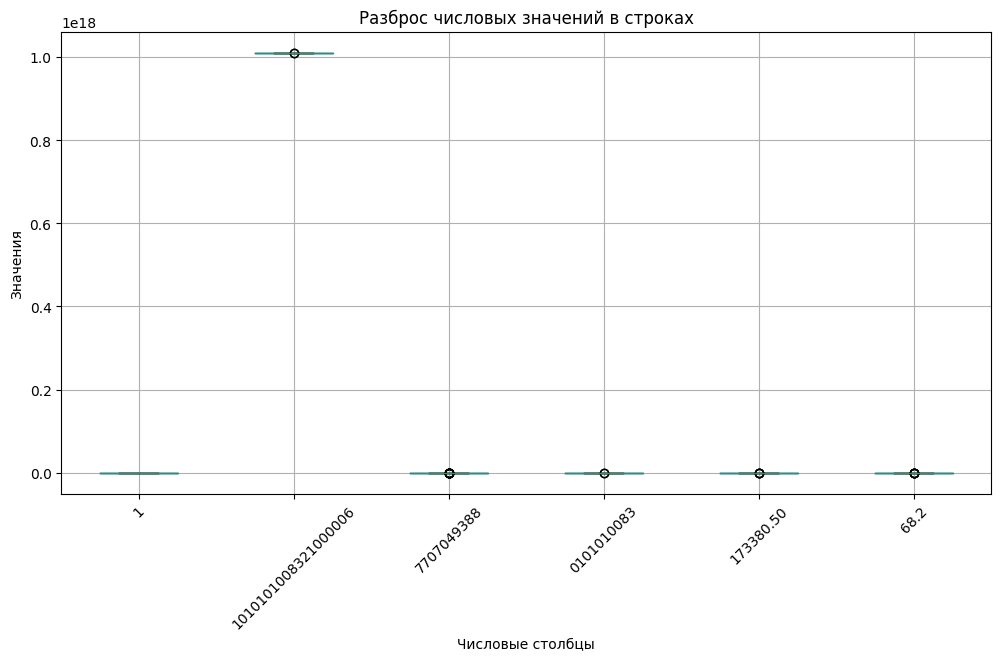

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных, пропуская первую строку и используя вторую как заголовок
df = pd.read_csv('fz.csv', on_bad_lines="skip", header=0, nrows = 50)

# Фильтруем только числовые столбцы
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Построение boxplot для числовых значений
plt.figure(figsize=(12, 6))
numeric_df.boxplot()
plt.title("Разброс числовых значений в строках")
plt.xlabel("Числовые столбцы")
plt.ylabel("Значения")
plt.xticks(rotation=45)
plt.show()


Обучение модели 1.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack
import joblib

# 1. Загрузка и предварительная обработка данных
df = pd.read_csv('fz.csv', delimiter=',', header=None, nrows=200000, on_bad_lines='skip')

# Назначение имен столбцам
df.columns = [
    'ID', 'ContractNumber', 'ContractCode', 'SupplierINN', 'SupplierName', 'RegionCode', 'CustomerCode', 
    'CustomerName', 'Region', 'Field10', 'ContractStatus', 'ObjectOfProcurement', 'BudgetSource', 
    'SigningDate', 'StartDate', 'EndDate', 'Field17', 'Field18', 'TerminationDate', 'TerminationReason', 
    'Field21', 'Price', 'Field23', 'ChangeReason', 'Field25', 'OKPD2Description', 'OKPD2Code'
]

# Замена недостающих значений
df.replace({'\\N': pd.NA, '<НЕ ОПРЕДЕЛЕНО>': pd.NA}, inplace=True)
df.dropna(subset=['ObjectOfProcurement'], inplace=True)

# 2. Создание новых признаков
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])
df['ContractDuration'] = (df['EndDate'] - df['StartDate']).dt.days

df['Price'] = df['Price'].fillna(0).astype(float)
df['ContractDuration'] = df['ContractDuration'].fillna(0)

# 3. Подготовка целевой переменной
df['OKPD2Code'] = df['OKPD2Code'].astype(str).fillna('Прочее')

le = LabelEncoder()
df['GroupEncoded'] = le.fit_transform(df['OKPD2Code'])

# 4. Извлечение признаков из текста с использованием биграмм
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
text_features = tfidf.fit_transform(df['ObjectOfProcurement'].fillna(''))

# Объединение текстовых и числовых признаков
numerical_features = df[['Price', 'ContractDuration']].values
features = hstack([text_features, numerical_features])

# 5. Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, df['GroupEncoded'], test_size=0.2, random_state=42)

# 6. Оптимизация гиперпараметров Random Forest с использованием GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Используем лучшие параметры
best_rf = grid_search.best_estimator_

# 7. Оценка модели с лучшими параметрами
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized Accuracy: {accuracy:.2f}')

# Генерация отчета о классификации, учитывая только уникальные классы из y_test
print(classification_report(y_test, y_pred, labels=np.unique(y_test), target_names=le.inverse_transform(np.unique(y_test))))

# 8. Сохранение оптимизированной модели
joblib.dump(best_rf, 'optimized_rf_classifier.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# 9. Пример загрузки и предсказания для новых данных
def classify_new_contract(new_data):
    # Загрузка модели и инструментов
    best_rf = joblib.load('optimized_rf_classifier.pkl')
    le = joblib.load('label_encoder.pkl')
    tfidf = joblib.load('tfidf_vectorizer.pkl')
    
    # Предобработка нового текста
    new_text_features = tfidf.transform(new_data['ObjectOfProcurement'])
    new_numerical_features = new_data[['Price', 'ContractDuration']].values
    new_features = hstack([new_text_features, new_numerical_features])

    # Предсказание
    new_predictions = best_rf.predict(new_features)
    new_predictions_labels = le.inverse_transform(new_predictions)
    return new_predictions_labels

# Пример использования функции для нового контракта
new_data = pd.DataFrame({
    'ObjectOfProcurement': ['Поставка строительных материалов для ремонта здания'],
    'Price': [1500000.0],
    'ContractDuration': [30]
})
predicted_group = classify_new_contract(new_data)
print(f'Предсказанная группа: {predicted_group[0]}')

Предсказания модели

In [45]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack
import joblib
# 9. Пример загрузки и предсказания для новых данных
def classify_new_contract(new_data):
    # Загрузка модели и инструментов
    best_rf = joblib.load('optimized_rf_classifier.pkl')
    le = joblib.load('label_encoder.pkl')
    tfidf = joblib.load('tfidf_vectorizer.pkl')
    
    # Предобработка нового текста
    new_text_features = tfidf.transform(new_data['ObjectOfProcurement'])
    new_numerical_features = new_data[['Price', 'ContractDuration']].values
    new_features = hstack([new_text_features, new_numerical_features])

    # Предсказание
    new_predictions = best_rf.predict(new_features)
    new_predictions_labels = le.inverse_transform(new_predictions)
    return new_predictions_labels

# Пример использования функции для нового контракта
new_data = pd.DataFrame({
    'ObjectOfProcurement': ['Строительно монтажные работы'],
    'Price': [76500],
    'ContractDuration': [15]
})
predicted_group = classify_new_contract(new_data)
print(f'Предсказанная группа: {predicted_group[0]}')

Предсказанная группа: 43.3


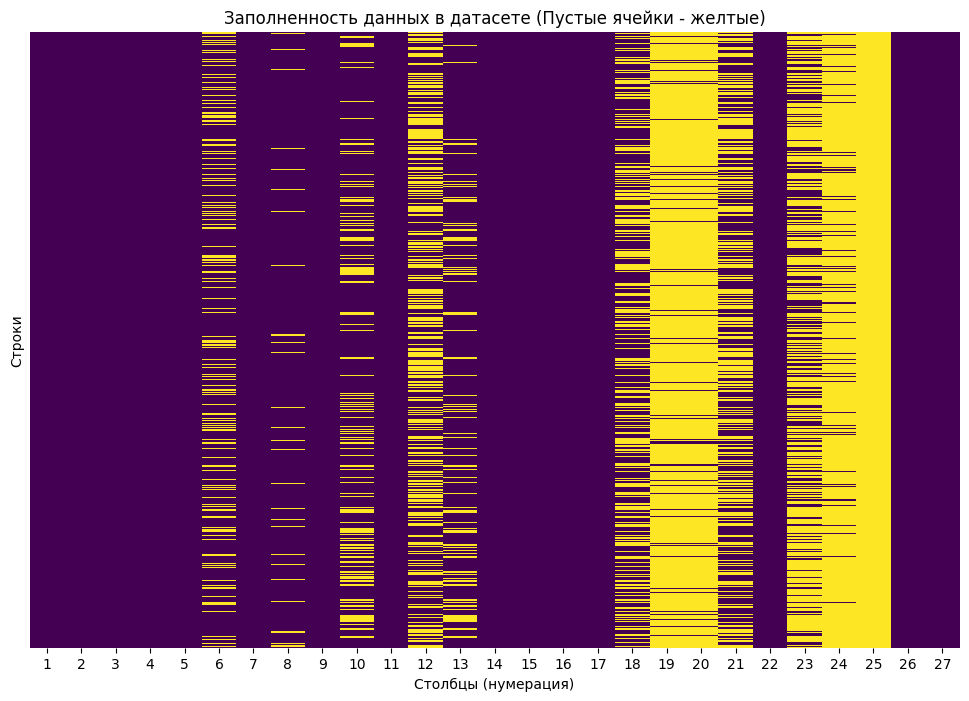

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем небольшой фрагмент данных
df_sample = pd.read_csv('fz.csv', nrows=20000, on_bad_lines='skip')

# Заменяем строки, которые представляют отсутствие данных, на NaN
df_sample.replace({'\\N': pd.NA, '<НЕ ОПРЕДЕЛЕНО>': pd.NA, '0': pd.NA}, inplace=True)

# Настройка графика
plt.figure(figsize=(12, 8))
sns.heatmap(df_sample.isna(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=range(1, df_sample.shape[1] + 1))
plt.title("Заполненность данных в датасете (Пустые ячейки - желтые)")
plt.xlabel("Столбцы (нумерация)")
plt.ylabel("Строки")
plt.show()


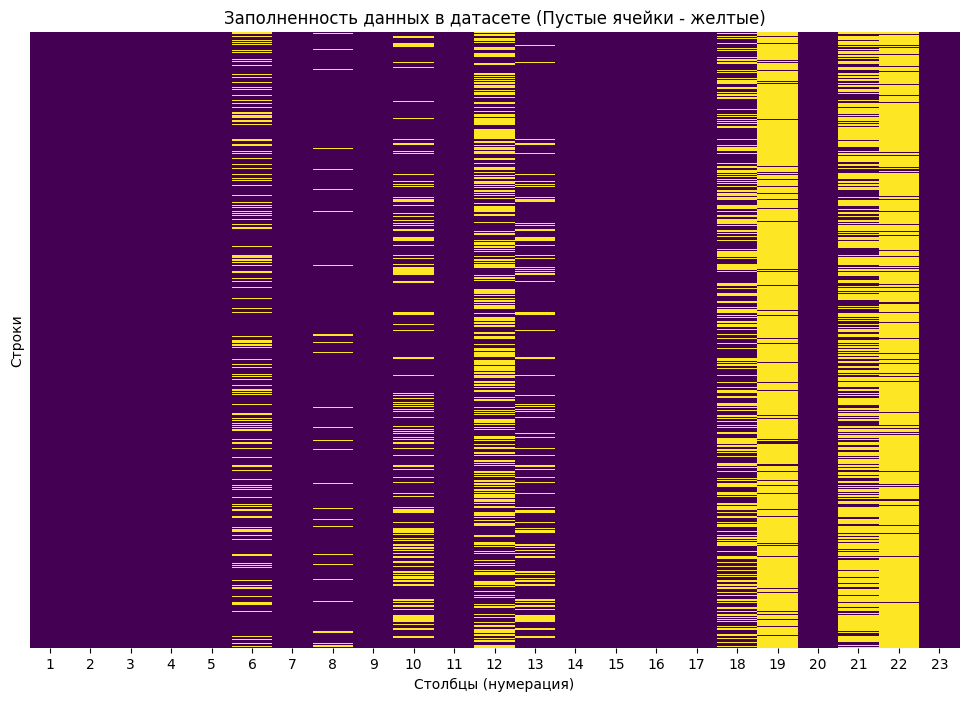

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем небольшой фрагмент данных
df_sample = pd.read_csv('fz.csv', nrows=20000, on_bad_lines='skip')

# Заменяем строки, которые представляют отсутствие данных, на NaN
df_sample.replace({'\\N': pd.NA, '<НЕ ОПРЕДЕЛЕНО>': pd.NA, '0': pd.NA}, inplace=True)

# Удаляем столбцы с индексами 19, 20, 24 и 25
df_sample.drop(df_sample.columns[[19, 20, 24, 25,]], axis=1, inplace=True)
df_sample.to_csv('new_fz.csv', index=False)
# Настройка графика
plt.figure(figsize=(12, 8))
sns.heatmap(df_sample.isna(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=range(1, df_sample.shape[1] + 1))
plt.title("Заполненность данных в датасете (Пустые ячейки - желтые)")
plt.xlabel("Столбцы (нумерация)")
plt.ylabel("Строки")
plt.show()


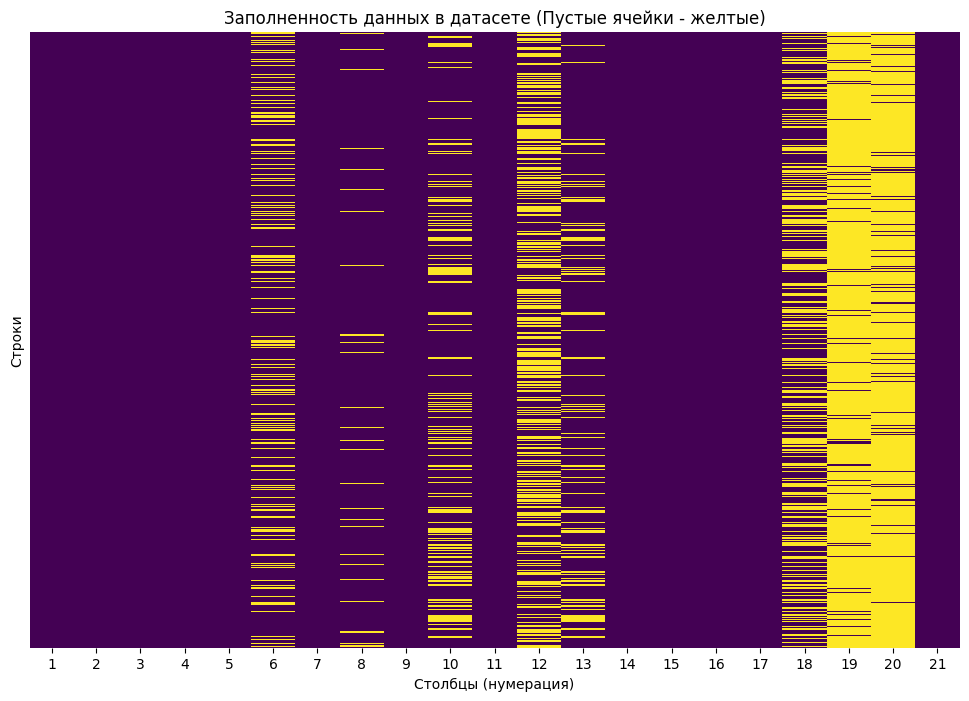

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем небольшой фрагмент данных
df_sample = pd.read_csv('new_fz.csv', nrows=20000, on_bad_lines='skip')

# Заменяем строки, которые представляют отсутствие данных, на NaN
df_sample.replace({'\\N': pd.NA, '<НЕ ОПРЕДЕЛЕНО>': pd.NA, '0': pd.NA}, inplace=True)

# Удаляем столбцы с индексами 19, 20, 24 и 25
df_sample.drop(df_sample.columns[[19, 20]], axis=1, inplace=True)
df_sample.to_csv('new_fz.csv', index=False)
# Настройка графика
plt.figure(figsize=(12, 8))
sns.heatmap(df_sample.isna(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=range(1, df_sample.shape[1] + 1))
plt.title("Заполненность данных в датасете (Пустые ячейки - желтые)")
plt.xlabel("Столбцы (нумерация)")
plt.ylabel("Строки")
plt.show()


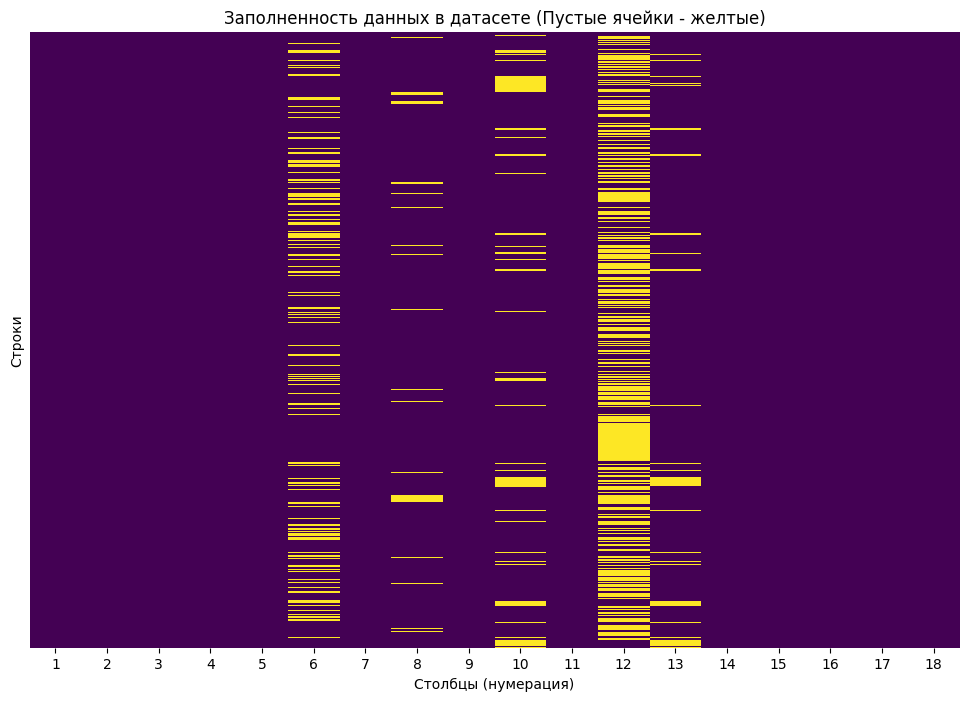

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем небольшой фрагмент данных
df_sample = pd.read_csv('new_fz.csv', nrows=5000, on_bad_lines='skip')

# Заменяем строки, которые представляют отсутствие данных, на NaN
df_sample.replace({'\\N': pd.NA, '<НЕ ОПРЕДЕЛЕНО>': pd.NA, '0': pd.NA}, inplace=True)

# Удаляем столбцы с индексами 19, 20, 24 и 25
df_sample.drop(df_sample.columns[[17,18, 19]], axis=1, inplace=True)
df_sample.to_csv('new_fz.csv', index=False)
# Настройка графика
plt.figure(figsize=(12, 8))
sns.heatmap(df_sample.isna(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=range(1, df_sample.shape[1] + 1))
plt.title("Заполненность данных в датасете (Пустые ячейки - желтые)")
plt.xlabel("Столбцы (нумерация)")
plt.ylabel("Строки")
plt.show()


In [18]:
df = pd.read_csv('new_fz.csv', nrows=5000, on_bad_lines='skip')
df.columns = [f"column_{i}" for i in range(1, len(df.columns) + 1)]

# Проверяем результат переименования
df.to_csv('new_fz.csv', index=False)
df.head()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18
0,2,1010101008321000006,211010101008301010100100100246820244,7707049388,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО \РОСТЕЛЕКОМ\""""",78.0,101010083,"МО МВД РОССИИ \КОШЕХАБЛЬСКИЙ\""""",Республика Адыгея (Адыгея),18803020840390049244,Контракт исполнен,NaN,федеральный бюджет,2021-12-02,2021-01-01,2021-12-30,2022-01-14,68.2
1,3,1010101008321000007,211010101008301010100100100236820244,105076166,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \МАН ...,1.0,101010083,"МО МВД РОССИИ \КОШЕХАБЛЬСКИЙ\""""",Республика Адыгея (Адыгея),18803020840390049244,Контракт исполнен,NaN,федеральный бюджет,2021-12-09,2021-12-09,2021-12-31,2022-01-14,68.2
2,4,1010501691421000144,211010501691401050100101960012640323,6630008994,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \КРУС...,66.0,105016914,ГУ-РО ФОНДА СОЦИАЛЬНОГО СТРАХОВАНИЯ РОССИЙСКОЙ...,Республика Адыгея (Адыгея),39310030440139570323,Контракт исполнен,На поставку специальных устройств для чтения «...,бюджет Фонда социального страхования Российско...,2021-12-01,2021-12-01,2022-09-30,2022-10-07,26.4
3,6,1010501691421000148,211010501691401050100101940012640323,7743763319,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \МЕДИ...,77.0,105016914,ГУ-РО ФОНДА СОЦИАЛЬНОГО СТРАХОВАНИЯ РОССИЙСКОЙ...,Республика Адыгея (Адыгея),39310030440139570323,Контракт заключен,На поставку голосообразующих аппаратов для обе...,бюджет Фонда социального страхования Российско...,2021-12-03,2021-12-03,2022-09-30,2022-10-07,26.4
4,8,1010501691421000150,211010501691401050100102290015310244,7724490000,"АКЦИОНЕРНОЕ ОБЩЕСТВО \ПОЧТА РОССИИ\""""",77.0,105016914,ГУ-РО ФОНДА СОЦИАЛЬНОГО СТРАХОВАНИЯ РОССИЙСКОЙ...,Республика Адыгея (Адыгея),39310060370290059244,Контракт исполнен,NaN,бюджет Фонда социального страхования Российско...,2021-12-01,2021-12-01,2021-12-31,2022-01-14,53.1


In [19]:
import pandas as pd

# Чтение файла с очисткой и проверкой количества столбцов
with open('new_fz.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    header = lines[0].replace('\n', '').replace('"', '').split(',')
    data_rows = [
        line.replace('\n', '').replace('"', '').split(',')
        for line in lines[1:]
        if len(line.replace('\n', '').replace('"', '').split(',')) == len(header)
    ]

# Преобразование в DataFrame
data = pd.DataFrame(data_rows, columns=header)

# Просмотр первых строк
print(data.head())


  column_1             column_2                              column_3  \
0        2  1010101008321000006  211010101008301010100100100246820244   
1        3  1010101008321000007  211010101008301010100100100236820244   
2        4  1010501691421000144  211010501691401050100101960012640323   
3        6  1010501691421000148  211010501691401050100101940012640323   
4        8  1010501691421000150  211010501691401050100102290015310244   

     column_4                                           column_5 column_6  \
0  7707049388        ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО \РОСТЕЛЕКОМ\     78.0   
1   105076166  ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \МАН ...      1.0   
2  6630008994   ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \КРУСТ\     66.0   
3  7743763319  ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \МЕДИ...     77.0   
4  7724490000                АКЦИОНЕРНОЕ ОБЩЕСТВО \ПОЧТА РОССИИ\     77.0   

    column_7                                           column_8  \
0  101010083                   

Исследование датасета на обучение для предсказания целевого признака column_5 (объект закупки)

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Загрузка и предобработка данных
data = pd.read_csv('new_fz.csv')
data.columns = [f'column_{i+1}' for i in range(len(data.columns))]

# Преобразуем столбцы для числовых и временных данных
data['price'] = pd.to_numeric(data['column_6'], errors='coerce')
data['duration'] = (pd.to_datetime(data['column_16'], errors='coerce') - 
                    pd.to_datetime(data['column_14'], errors='coerce')).dt.days

# Удаляем строки с пропусками в важных столбцах
data = data.dropna(subset=['price', 'duration', 'column_3', 'column_5'])

# Упрощение меток: заменим редкие классы на "другие"
data['label'] = data['column_5']
rare_threshold = 5  # минимальное количество примеров для класса
frequent_classes = data['label'].value_counts()[data['label'].value_counts() >= rare_threshold].index
data['label'] = data['label'].apply(lambda label: label if label in frequent_classes else 'Other')

# Балансировка классов
balanced_data = pd.concat([
    resample(data[data['label'] == cls], replace=True, n_samples=data['label'].value_counts().max(), random_state=42)
    for cls in data['label'].unique()
])

# Векторизация текста из column_3
vectorizer = TfidfVectorizer(max_features=500)
X_text = vectorizer.fit_transform(balanced_data['column_3']).toarray()

# Объединение числовых признаков с текстовыми
X = pd.DataFrame(X_text)
X['price'] = balanced_data['price'].reset_index(drop=True)
X['duration'] = balanced_data['duration'].reset_index(drop=True)
y = balanced_data['label'].reset_index(drop=True)

# Преобразование всех имен столбцов в строки
X.columns = X.columns.astype(str)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))




                                                                                                                                                                  precision    recall  f1-score   support

                                                                                                                                                           Other       1.00      0.74      0.85       452
                                                                                                            АКЦИОНЕРНОЕ ОБЩЕСТВО \ГАЗПРОМ МЕЖРЕГИОНГАЗ КАЗАНЬ\""       0.79      0.93      0.85       440
                                                                              АКЦИОНЕРНОЕ ОБЩЕСТВО \ЕНИСЕЙСКАЯ ТЕРРИТОРИАЛЬНАЯ ГЕНЕРИРУЮЩАЯ КОМПАНИЯ (ТГК-13)\""       1.00      1.00      1.00       441
                                                                                                                          АКЦИОНЕРНОЕ ОБЩЕСТВО \КЫЗЫЛСКАЯ ТЭЦ\""       1.00      1.00      1.00

Обучение модели на всех группах ОКПД-2

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Загрузка и предобработка данных
data = pd.read_csv('new_fz.csv')
data.columns = [f'column_{i+1}' for i in range(len(data.columns))]

# Преобразуем столбцы для числовых и временных данных
data['price'] = pd.to_numeric(data['column_6'], errors='coerce')
data['duration'] = (pd.to_datetime(data['column_16'], errors='coerce') - 
                    pd.to_datetime(data['column_14'], errors='coerce')).dt.days

# Удаляем строки с пропусками в важных столбцах
data = data.dropna(subset=['price', 'duration', 'column_3', 'column_12'])

# Балансировка классов
data['label'] = data['column_12']
balanced_data = pd.concat([
    resample(data[data['label'] == cls], replace=True, n_samples=data['label'].value_counts().max(), random_state=42)
    for cls in data['label'].unique()
])

# Векторизация текста из column_3
vectorizer = TfidfVectorizer(max_features=500)
X_text = vectorizer.fit_transform(balanced_data['column_3']).toarray()

# Объединение числовых признаков с текстовыми
X = pd.DataFrame(X_text)
X['price'] = balanced_data['price'].reset_index(drop=True)
X['duration'] = balanced_data['duration'].reset_index(drop=True)
y = balanced_data['label'].reset_index(drop=True)

# Преобразование всех имен столбцов в строки
X.columns = X.columns.astype(str)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))



def predict_custom_data(text, price, duration):
    # Преобразуем текстовые данные в векторное представление
    X_text = vectorizer.transform([text]).toarray()
    
    # Создаем DataFrame для новых данных
    X_new = pd.DataFrame(X_text)
    X_new['price'] = [price]
    X_new['duration'] = [duration]
    
    # Убедимся, что все имена столбцов – строки
    X_new.columns = X_new.columns.astype(str)
    
    # Предсказание на пользовательских данных
    prediction = model.predict(X_new)
    return prediction[0]

# Пример использования
text = "Проектно-изыскательские работы (ПИР)"
price = 116677933
duration = 806
predicted_label = predict_custom_data(text, price, duration)
print("Предсказанный класс:", predicted_label)

                                                                                                                                                                                                                                                                                                                                                                                                         precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                          (прочая закупка товаров, работ, услуг) Поставка нефтепродуктов через сеть АЗС с использованием топливных карт       1.00      1.00      1.00         5
                                                                                                                                     

Векторизация данных

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Загрузка данных
file_path = 'new_fz.csv'
df = pd.read_csv(file_path)

# Определение текстовых столбцов, которые необходимо векторизовать
text_columns = ['column_5', 'column_8', 'column_9', 'column_11']

# Векторизация каждого текстового столбца и замена на векторное представление
for column in text_columns:
    # Инициализация TF-IDF векторизатора
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df[column].fillna(""))

    # Преобразование матрицы TF-IDF в DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column}_{i}" for i in range(tfidf_matrix.shape[1])])

    # Заменяем исходный текстовый столбец на его векторное представление
    df = df.drop(column, axis=1)  # Удаляем исходный текстовый столбец
    df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)  # Добавляем векторный

# Сохранение результата
df.to_csv('vectorized_new_fz.csv', index=False)

print("Векторизация завершена. Итоговый файл сохранен как vectorized_new_fz.csv.")



Векторизация завершена. Итоговый файл сохранен как vectorized_new_fz.csv.


In [35]:
df = pd.read_csv('vectorized_new_fz.csv', nrows=5000, on_bad_lines='skip')

df.head()

,column_1,column_2,column_3,column_4,column_6,column_7,column_10,column_12,column_13,column_14,...,column_9_44,column_9_45,column_9_46,column_9_47,column_11_0,column_11_1,column_11_2,column_11_3,column_11_4,column_11_5
0,2,1010101008321000006,211010101008301010100100100246820244,7707049388,78.0,101010083,18803020840390049244,NaN,федеральный бюджет,2021-12-02,...,0.0,0.0,0.0,0.0,0.000000,0.79487,0.0,0.606780,0.0,0.0
1,3,1010101008321000007,211010101008301010100100100236820244,105076166,1.0,101010083,18803020840390049244,NaN,федеральный бюджет,2021-12-09,...,0.0,0.0,0.0,0.0,0.000000,0.79487,0.0,0.606780,0.0,0.0
2,4,1010501691421000144,211010501691401050100101960012640323,6630008994,66.0,105016914,39310030440139570323,На поставку специальных устройств для чтения «...,бюджет Фонда социального страхования Российско...,2021-12-01,...,0.0,0.0,0.0,0.0,0.000000,0.79487,0.0,0.606780,0.0,0.0
3,6,1010501691421000148,211010501691401050100101940012640323,7743763319,77.0,105016914,39310030440139570323,На поставку голосообразующих аппаратов для обе...,бюджет Фонда социального страхования Российско...,2021-12-03,...,0.0,0.0,0.0,0.0,0.910374,0.00000,0.0,0.413786,0.0,0.0
4,8,1010501691421000150,211010501691401050100102290015310244,7724490000,77.0,105016914,39310060370290059244,NaN,бюджет Фонда социального страхования Российско...,2021-12-01,...,0.0,0.0,0.0,0.0,0.000000,0.79487,0.0,0.606780,0.0,0.0


Исследование результата векторизации для обучения модели

In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Загрузка и предобработка данных
data = pd.read_csv('vectorized_new_fz.csv')
data.columns = [f'column_{i+1}' for i in range(len(data.columns))]

# Преобразуем столбцы для числовых и временных данных
data['price'] = pd.to_numeric(data['column_6'], errors='coerce')
data['duration'] = (pd.to_datetime(data['column_16'], errors='coerce') - 
                    pd.to_datetime(data['column_14'], errors='coerce')).dt.days

# Удаляем строки с пропусками в важных столбцах
data = data.dropna(subset=['price', 'duration', 'column_3', 'column_5'])

# Упрощение меток: заменим редкие классы на "другие"
data['label'] = data['column_5']
rare_threshold = 5  # минимальное количество примеров для класса
frequent_classes = data['label'].value_counts()[data['label'].value_counts() >= rare_threshold].index
data['label'] = data['label'].apply(lambda label: label if label in frequent_classes else 'Other')

# Приведение меток к строковому формату
data['label'] = data['label'].astype(str)

# Балансировка классов
balanced_data = pd.concat([
    resample(data[data['label'] == cls], replace=True, n_samples=data['label'].value_counts().max(), random_state=42)
    for cls in data['label'].unique()
])

# Векторизация текста из column_3
vectorizer = TfidfVectorizer(max_features=500)
X_text = vectorizer.fit_transform(balanced_data['column_3']).toarray()

# Объединение числовых признаков с текстовыми
X = pd.DataFrame(X_text)
X['price'] = balanced_data['price'].reset_index(drop=True)
X['duration'] = balanced_data['duration'].reset_index(drop=True)
y = balanced_data['label'].reset_index(drop=True)

# Преобразование всех имен столбцов в строки
X.columns = X.columns.astype(str)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

         1.0       0.91      0.94      0.93       127
        10.0       0.85      0.87      0.86       120
        11.0       0.90      0.93      0.92       145
        12.0       0.83      0.95      0.89       138
        13.0       0.82      0.96      0.89       140
        14.0       0.90      0.97      0.93       137
        15.0       0.89      1.00      0.94       129
        16.0       0.83      0.80      0.82       128
        17.0       0.96      1.00      0.98       131
        18.0       0.91      0.88      0.90       138
        19.0       0.88      0.95      0.91       129
         2.0       0.77      0.88      0.82       112
        20.0       1.00      1.00      1.00       125
        21.0       0.85      0.81      0.83       124
        22.0       0.85      0.90      0.88       136
        23.0       0.89      0.84      0.86       129
        24.0       0.84      0.80      0.82       130
        26.0       0.96    

1. Станадртизация и нормализация

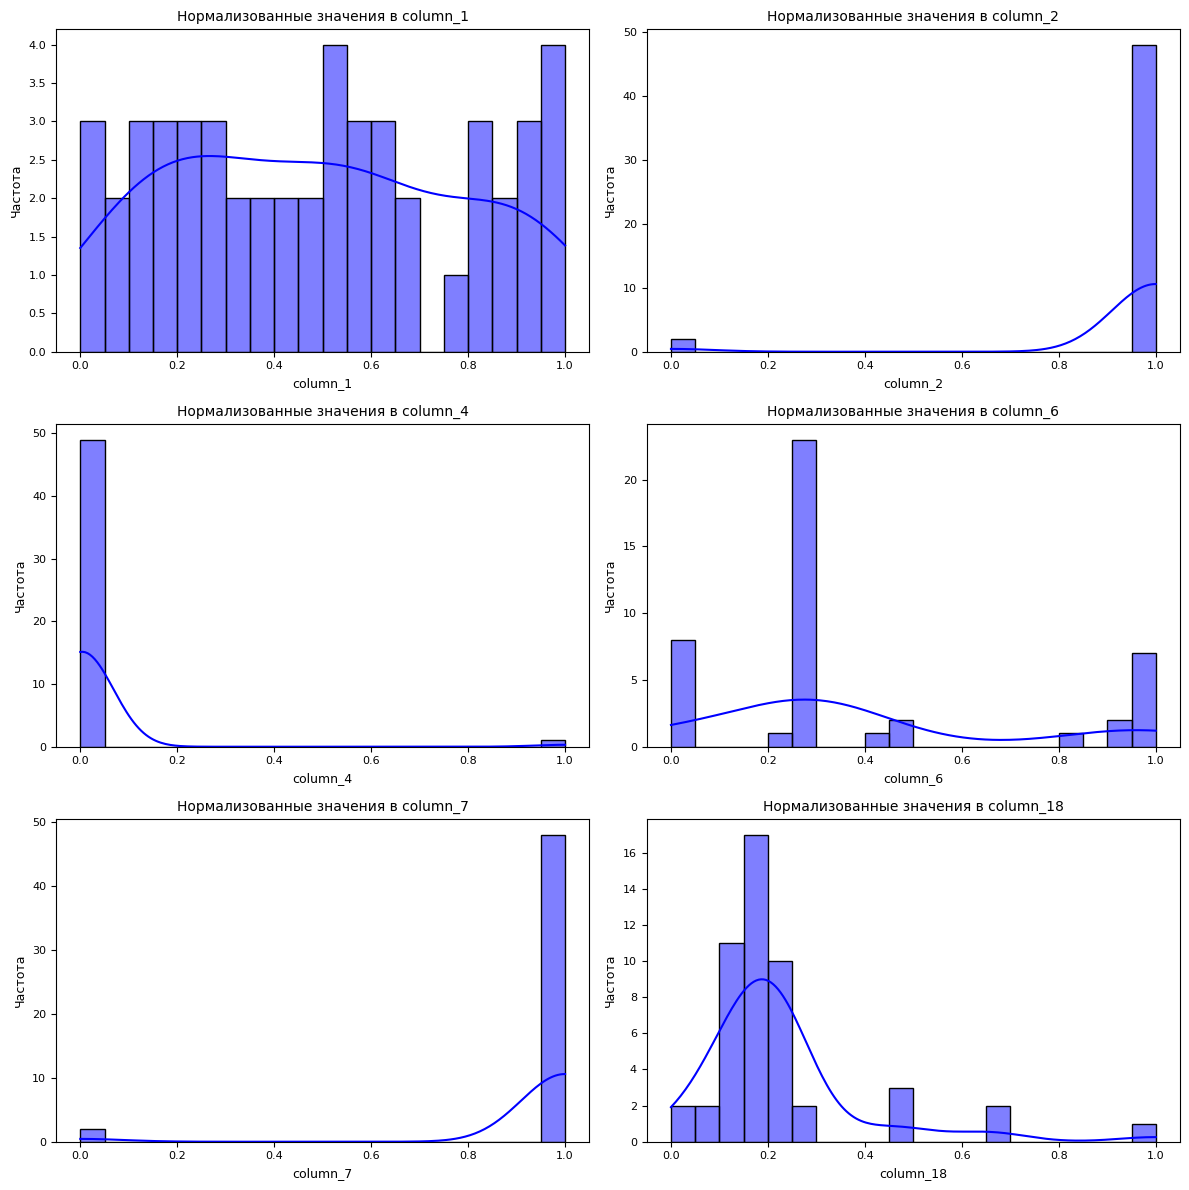

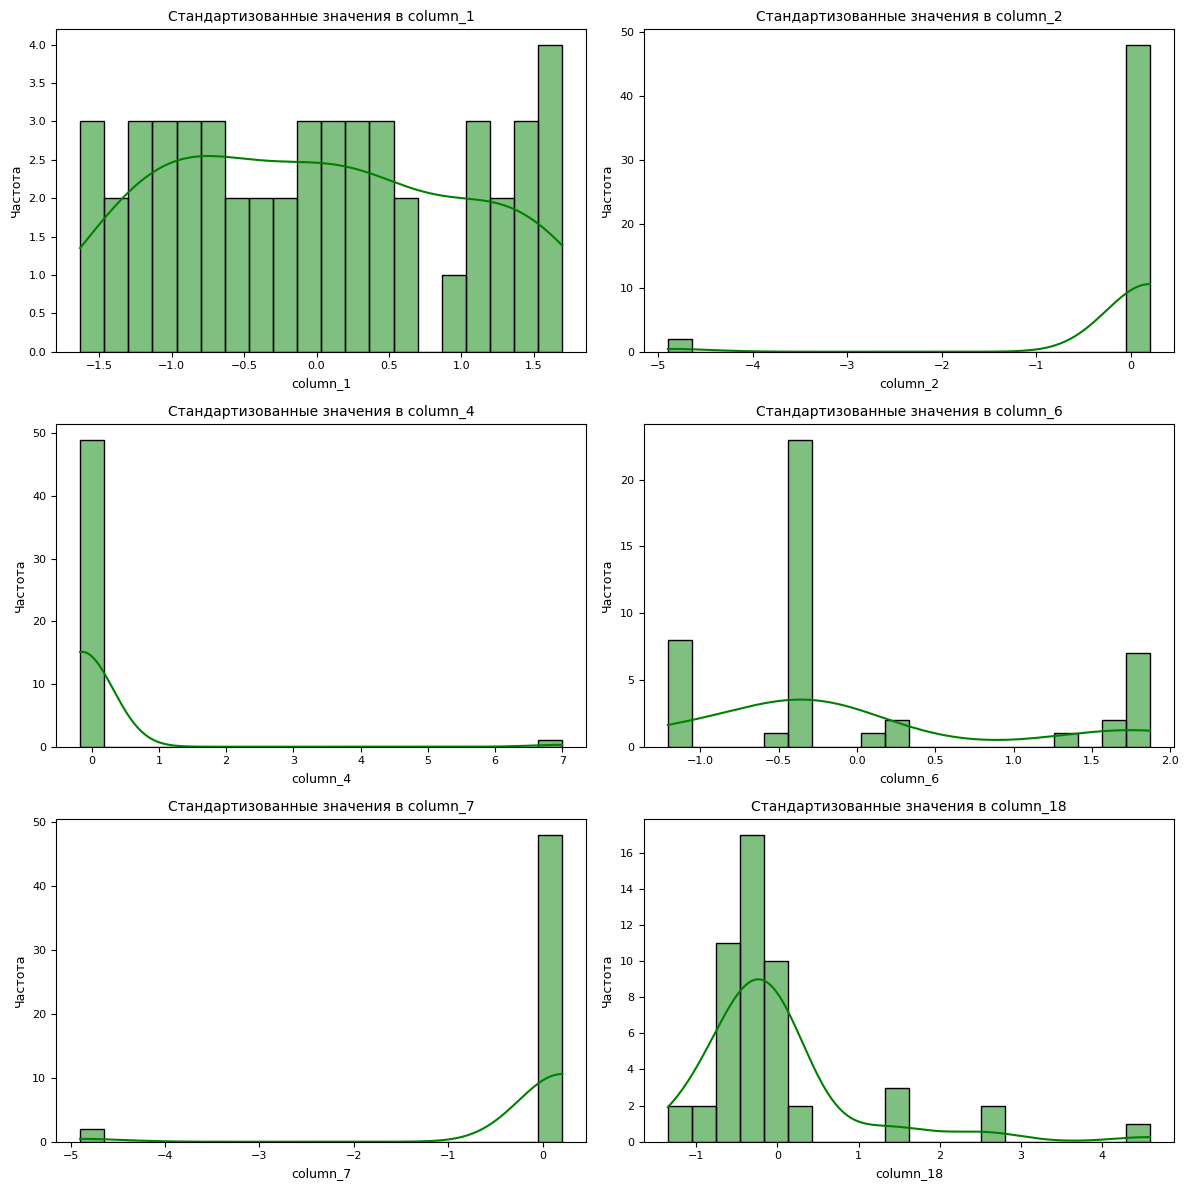

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math

# Загрузка данных
file_path = 'vectorized_new_fz.csv'
df = pd.read_csv(file_path, nrows=50, on_bad_lines='skip')

# Сохраняем текстовые данные отдельно
text_df = df.select_dtypes(exclude=['float64', 'int64'])

# Выбираем числовые столбцы для нормализации и стандартизации
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Нормализация числовых данных
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(numeric_df)
normalized_df = pd.DataFrame(normalized_data, columns=numeric_df.columns)

# Стандартизация числовых данных
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(numeric_df)
standardized_df = pd.DataFrame(standardized_data, columns=numeric_df.columns)

# Объединяем текстовые данные с нормализованными числовыми данными
final_normalized_df = pd.concat([text_df.reset_index(drop=True), normalized_df], axis=1)

# Объединяем текстовые данные со стандартизованными числовыми данными
final_standardized_df = pd.concat([text_df.reset_index(drop=True), standardized_df], axis=1)

# Сохранение обоих датасетов с сохранением текстовых столбцов
final_normalized_df.to_csv('normalized_new_fz.csv', index=False)
final_standardized_df.to_csv('standardized_new_fz.csv', index=False)

# Построение гистограмм для нормализованных данных
columns_to_plot = 6  # Ограничение количества столбцов для построения графиков за один раз
for start in range(0, 5, columns_to_plot):
    end = min(start + columns_to_plot, len(normalized_df.columns))
    columns_subset = normalized_df.columns[start:end]
    num_rows = math.ceil(len(columns_subset) / 2)
    plt.figure(figsize=(12, 4 * num_rows))
    for i, column in enumerate(columns_subset, 1):
        plt.subplot(num_rows, 2, i)
        sns.histplot(normalized_df[column].dropna(), kde=True, color='blue', bins=20)
        plt.title(f'Нормализованные значения в {column}', fontsize=10)
        plt.xlabel(column, fontsize=9)
        plt.ylabel('Частота', fontsize=9)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

# Построение гистограмм для стандартизованных данных
for start in range(0, 5, columns_to_plot):
    end = min(start + columns_to_plot, len(standardized_df.columns))
    columns_subset = standardized_df.columns[start:end]
    num_rows = math.ceil(len(columns_subset) / 2)
    plt.figure(figsize=(12, 4 * num_rows))
    for i, column in enumerate(columns_subset, 1):
        plt.subplot(num_rows, 2, i)
        sns.histplot(standardized_df[column].dropna(), kde=True, color='green', bins=20)
        plt.title(f'Стандартизованные значения в {column}', fontsize=10)
        plt.xlabel(column, fontsize=9)
        plt.ylabel('Частота', fontsize=9)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()




Просмотр нормализированных значений

In [84]:
# Загружаем небольшой фрагмент данных
df_sample = pd.read_csv('normalized_new_fz.csv', nrows=5000, on_bad_lines='skip')

# Проверяем результат переименования
df_sample.head()

,column_1,column_2,column_4,column_6,column_7
0,0.000000,0.000000,0.008840,0.905882,0.000000
1,0.000759,0.000000,0.000004,0.000000,0.000000
2,0.001519,0.012967,0.007588,0.764706,0.012967
3,0.003037,0.012967,0.008883,0.894118,0.012967
4,0.004556,0.012967,0.008860,0.894118,0.012967


Исследование на обучение нормализированных данных

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Загрузка и предобработка данных
data = pd.read_csv('vectorized_new_fz.csv')
data.columns = [f'column_{i+1}' for i in range(len(data.columns))]

# Преобразуем столбцы для числовых и временных данных
data['price'] = pd.to_numeric(data['column_6'], errors='coerce')



# Объединение числовых признаков с текстовыми
X = pd.DataFrame(X_text)
X['price'] = balanced_data['price'].reset_index(drop=True)
X['duration'] = balanced_data['duration'].reset_index(drop=True)
y = balanced_data['label'].reset_index(drop=True)

# Преобразование всех имен столбцов в строки
X.columns = X.columns.astype(str)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

         1.0       0.91      0.94      0.93       127
        10.0       0.85      0.87      0.86       120
        11.0       0.90      0.93      0.92       145
        12.0       0.83      0.95      0.89       138
        13.0       0.82      0.96      0.89       140
        14.0       0.90      0.97      0.93       137
        15.0       0.89      1.00      0.94       129
        16.0       0.83      0.80      0.82       128
        17.0       0.96      1.00      0.98       131
        18.0       0.91      0.88      0.90       138
        19.0       0.88      0.95      0.91       129
         2.0       0.77      0.88      0.82       112
        20.0       1.00      1.00      1.00       125
        21.0       0.85      0.81      0.83       124
        22.0       0.85      0.90      0.88       136
        23.0       0.89      0.84      0.86       129
        24.0       0.84      0.80      0.82       130
        26.0       0.96    